CALLED


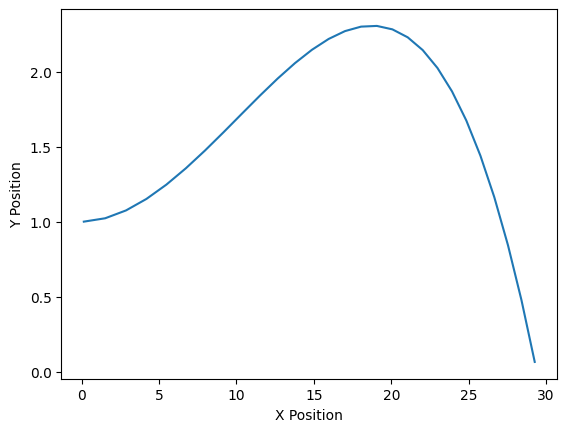

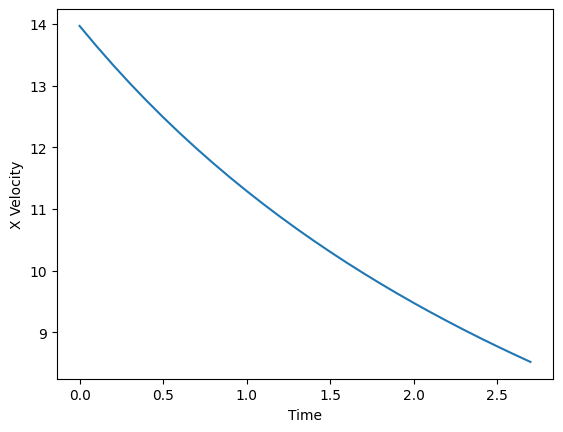

In [22]:
import math
import csv
import matplotlib.pyplot as plt

class Frisbee:
    def __init__(self):
        self.x = 0.0  # The x position of the frisbee.
        self.y = 0.0  # The y position of the frisbee.
        self.vx = 0.0  # The x velocity of the frisbee.
        self.vy = 0.0  # The y velocity of the frisbee.

    def simulate(self, y0, vx0, vy0, alpha, deltaT):
        time_list = []

        print("CALLED")
        g = -9.81  # The acceleration of gravity (m/s^2)
        m = 0.175  # The mass of a standard frisbee in kilograms
        RHO = 1.23  # The density of air in kg/m^3
        AREA = 0.0568  # The area of a standard frisbee
        CL0 = 0.1  # The lift coefficient at alpha = 0
        CLA = 1.4  # The lift coefficient dependent on alpha
        CD0 = 0.08  # The drag coefficient at alpha = 0
        CDA = 2.72  # The drag coefficient dependent on alpha
        ALPHA0 = -4  # A reference alpha value

        self.y = y0
        self.vx = vx0
        self.vy = vy0
        
        # A list to store simulation results
        results = []

        # A loop index to monitor the simulation steps
        k = 0

        # A while loop that performs iterations until the y position
        # reaches zero (i.e., the frisbee hits the ground).
        while self.y > 0:
            # Calculation of the lift coefficient using the relationship given
            # by S. A. Hummel.
            cl = CL0 + CLA * alpha * math.pi / 180

            # Calculation of the drag coefficient (for Prantl’s relationship)
            # using the relationship given by S. A. Hummel.
            cd = CD0 + CDA * math.pow((alpha - ALPHA0) * math.pi / 180, 2)

            # The change in velocity in the y direction obtained setting the
            # net force equal to the sum of the gravitational force and the
            # lift force and solving for delta v.
            deltavy = (RHO * math.pow(self.vx, 2) * AREA * cl / (2*m) + g) * deltaT #division????

            # The change in velocity in the x direction, obtained by
            # solving the force equation for delta v. (The only force
            # present is the drag force).
            deltavx = -RHO * math.pow(self.vx, 2) * AREA * cd * deltaT

            # The new positions and velocities are calculated using
            # simple introductory mechanics.
            self.vx = self.vx + deltavx
            self.vy = self.vy + deltavy
            self.x = self.x + self.vx * deltaT
            self.y = self.y + self.vy * deltaT
            

            # Store the results
            if k % 10 == 0:
                results.append([self.x, self.y, self.vx])
                time_list.append(k*deltaT)

            k += 1

            x_poss = []
            y_poss = []
            x_vels = []

            for i in range(0, len(results)):
                x_poss.append(results[i][0])
                y_poss.append(results[i][1])
                x_vels.append(results[i][2])

        plt.plot(x_poss, y_poss)
        plt.xlabel('X Position')
        plt.ylabel('Y Position')
        plt.show()


        plt.plot(time_list, x_vels)
        plt.xlabel('Time')
        plt.ylabel('X Velocity')
        plt.show()
        




frisbee_simulator = Frisbee()
frisbee_simulator.simulate(y0=1.0, vx0=14.0, vy0=0.0, alpha=10, deltaT=0.01)
